In [ ]:
# Heart desease Project

In [209]:

import numpy as np # linearalgebra
import pandas as pd # data CSV file 

from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

# For visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 

# Disable warnings
import warnings
warnings.simplefilter("ignore")


import warnings
warnings.filterwarnings("ignore")

## READ_DATA - EXPLORING_DATA

In [210]:
data=pd.read_csv("heart.csv")
df=data.copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [211]:
data.sample(5)  #chose randon sample from row

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [213]:
df.output.unique()

array([1, 0])

In [214]:
df.isnull().sum()  

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [215]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

In [216]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [217]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## VISUALIZATION

### Count_of_disease_and_not-desease

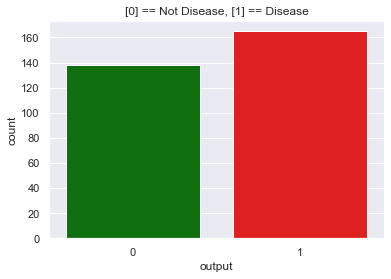

In [286]:
sns.countplot(df.output, palette=['green', 'red'])
plt.title("[0] == Not Disease, [1] == Disease");

### Showing where sickness and health is spread on a chart with dots.

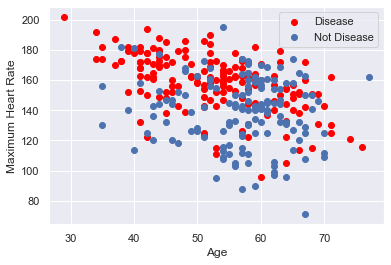

In [287]:
plt.scatter(x=df.age[df.output==1], y=df.thalachh[(df.output==1)], c="red")
plt.scatter(x=df.age[df.output==0], y=df.thalachh[(df.output==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### Distrbution_of_age_with_distplot*

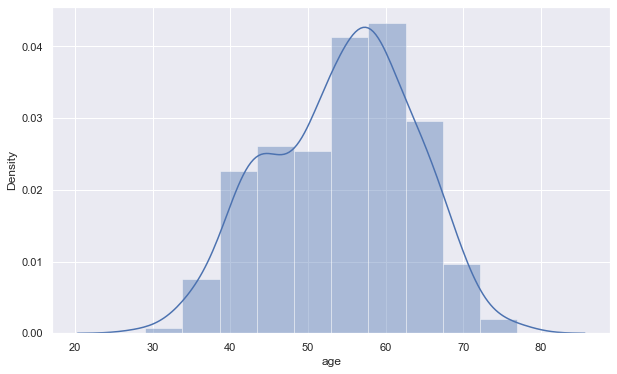

In [288]:
f, ax = plt.subplots(figsize=(10,6)) #DISTRUBUTION OF AGE WITH DISTPLOT
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

### Dividing_into_age_groups

In [221]:
young_ages=df[(df.age>=29)&(df.age<40)] 
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages   : ',len(young_ages))
print('Middle Ages  : ',len(middle_ages))
print('Elderly Ages : ',len(elderly_ages))

Young Ages   :  16
Middle Ages  :  128
Elderly Ages :  151


### age groups with barplot

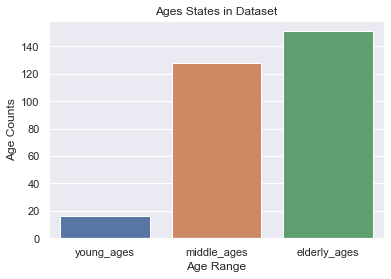

In [222]:
sns.barplot(x=['young_ages','middle_ages','elderly_ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages States in Dataset')
plt.show()

* There are a few young ages

### Dividing_into_age_groups_with_pieplot

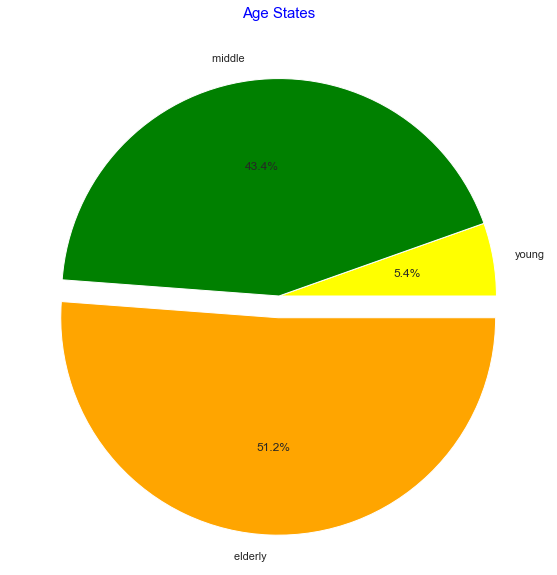

In [296]:
colors = ['yellow','green','orange']  #we can see in pie.
explode = [0,0,0.1]
plt.figure(figsize = (10,10))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young','middle ','elderly '],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age_States',color = 'blue',fontsize = 15)
plt.show()

### Distrubution Age and output with violinplot

No handles with labels found to put in legend.


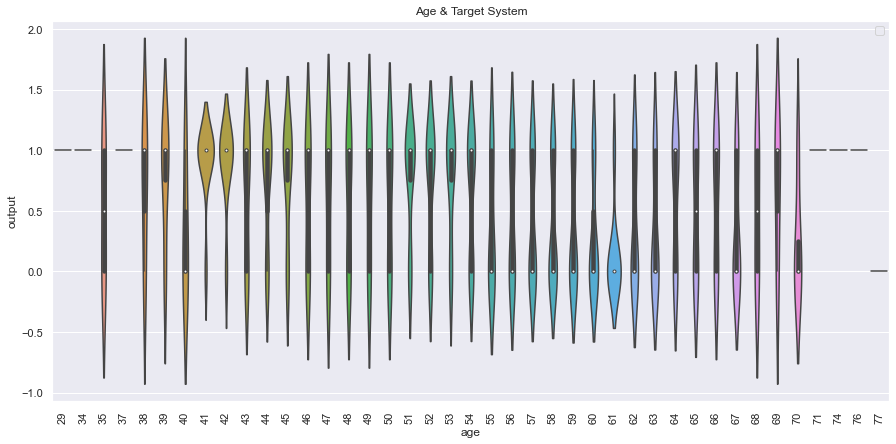

In [297]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df.age,y=df.output)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & Output System")
plt.show()

In [225]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### sex and ca (hue=output) with barplot

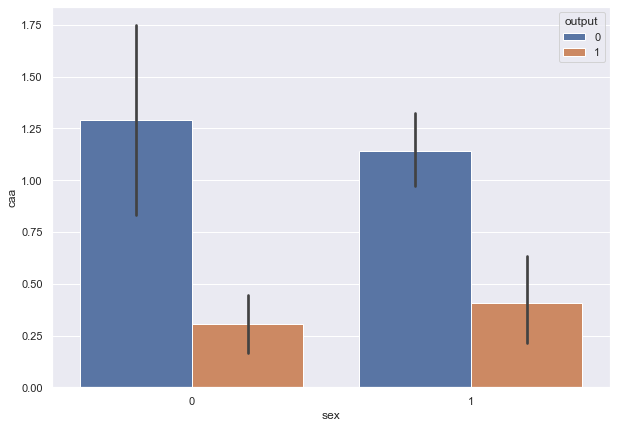

In [226]:
plt.figure(figsize=(10,7))
sns.barplot(x="sex",y = 'caa',hue = 'output',data=df);

### Sex and Oldpeak(hue=restecg)

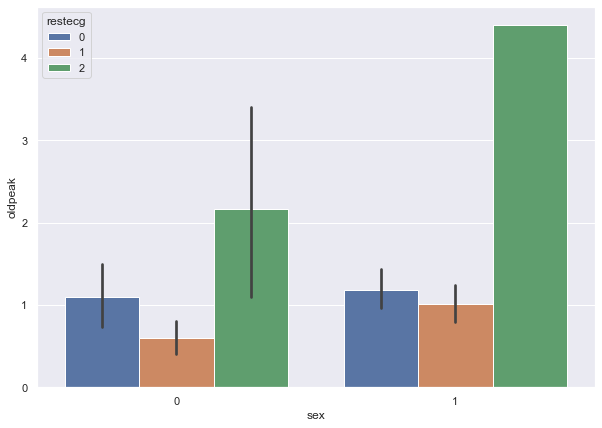

In [227]:
plt.figure(figsize=(10,7))
sns.barplot(x="sex",y = 'oldpeak',hue = 'restecg',data=df);

### Count of outputwith hue=sex

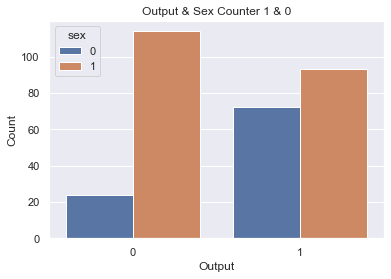

In [298]:
sns.countplot(df.output,hue=df.sex)
plt.xlabel('Output')
plt.ylabel('Count')
plt.title('Output & Sex Counter 1 & 0')
plt.show()

### Number of people who have heart disease according to age 

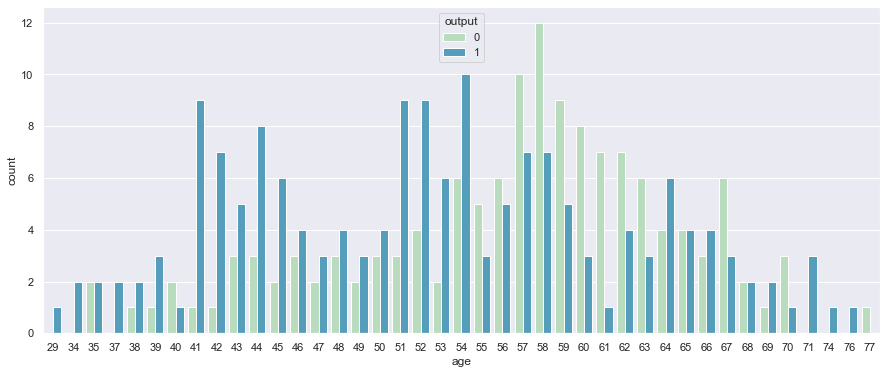

In [229]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'output',palette='GnBu')
plt.show()#Number of people who have heart disease according to age 

## Correlation_matrix(heatmap)

(14.5, -0.5)

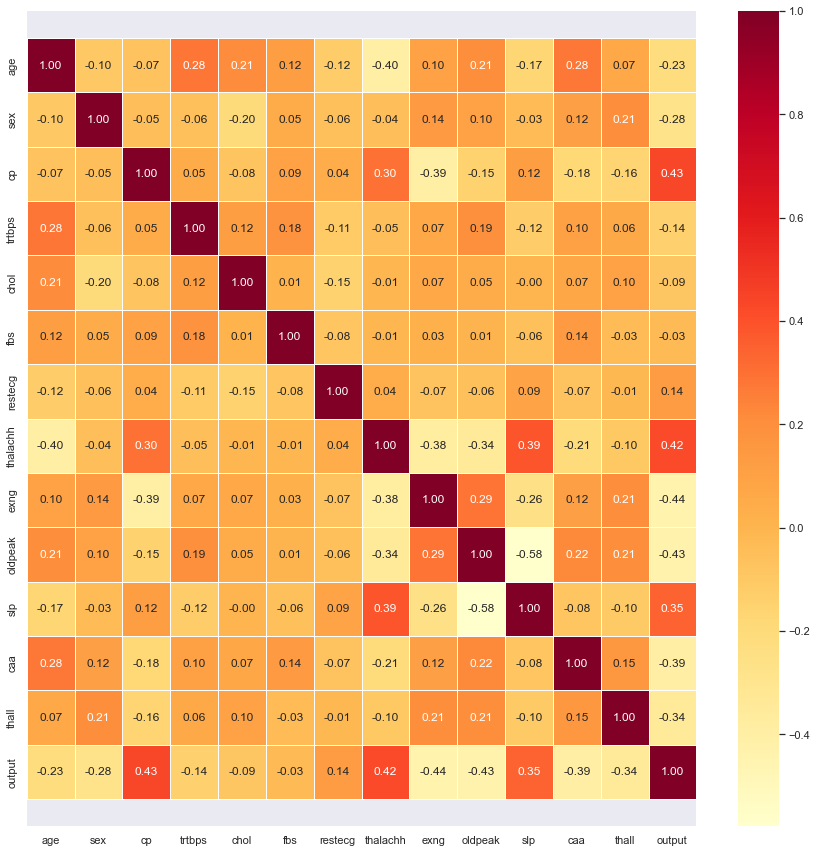

In [303]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlOrRd");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [231]:
df.groupby('cp',as_index=False)['output'].mean()

,cp,output
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [232]:
df.groupby('slp',as_index=False)['output'].mean()

,slp,output
0,0,0.428571
1,1,0.350000
2,2,0.753521


In [233]:
df.groupby('output').mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


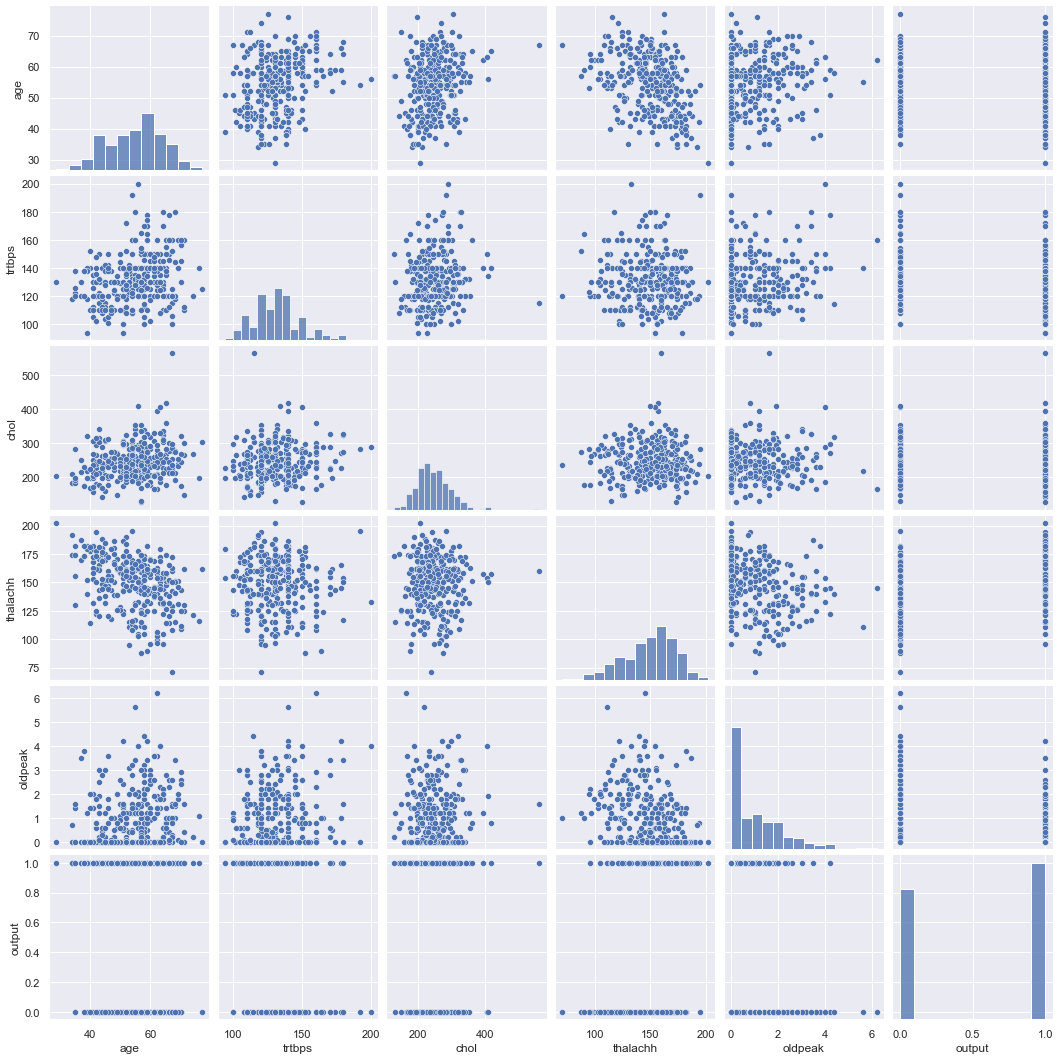

In [234]:
num_var = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

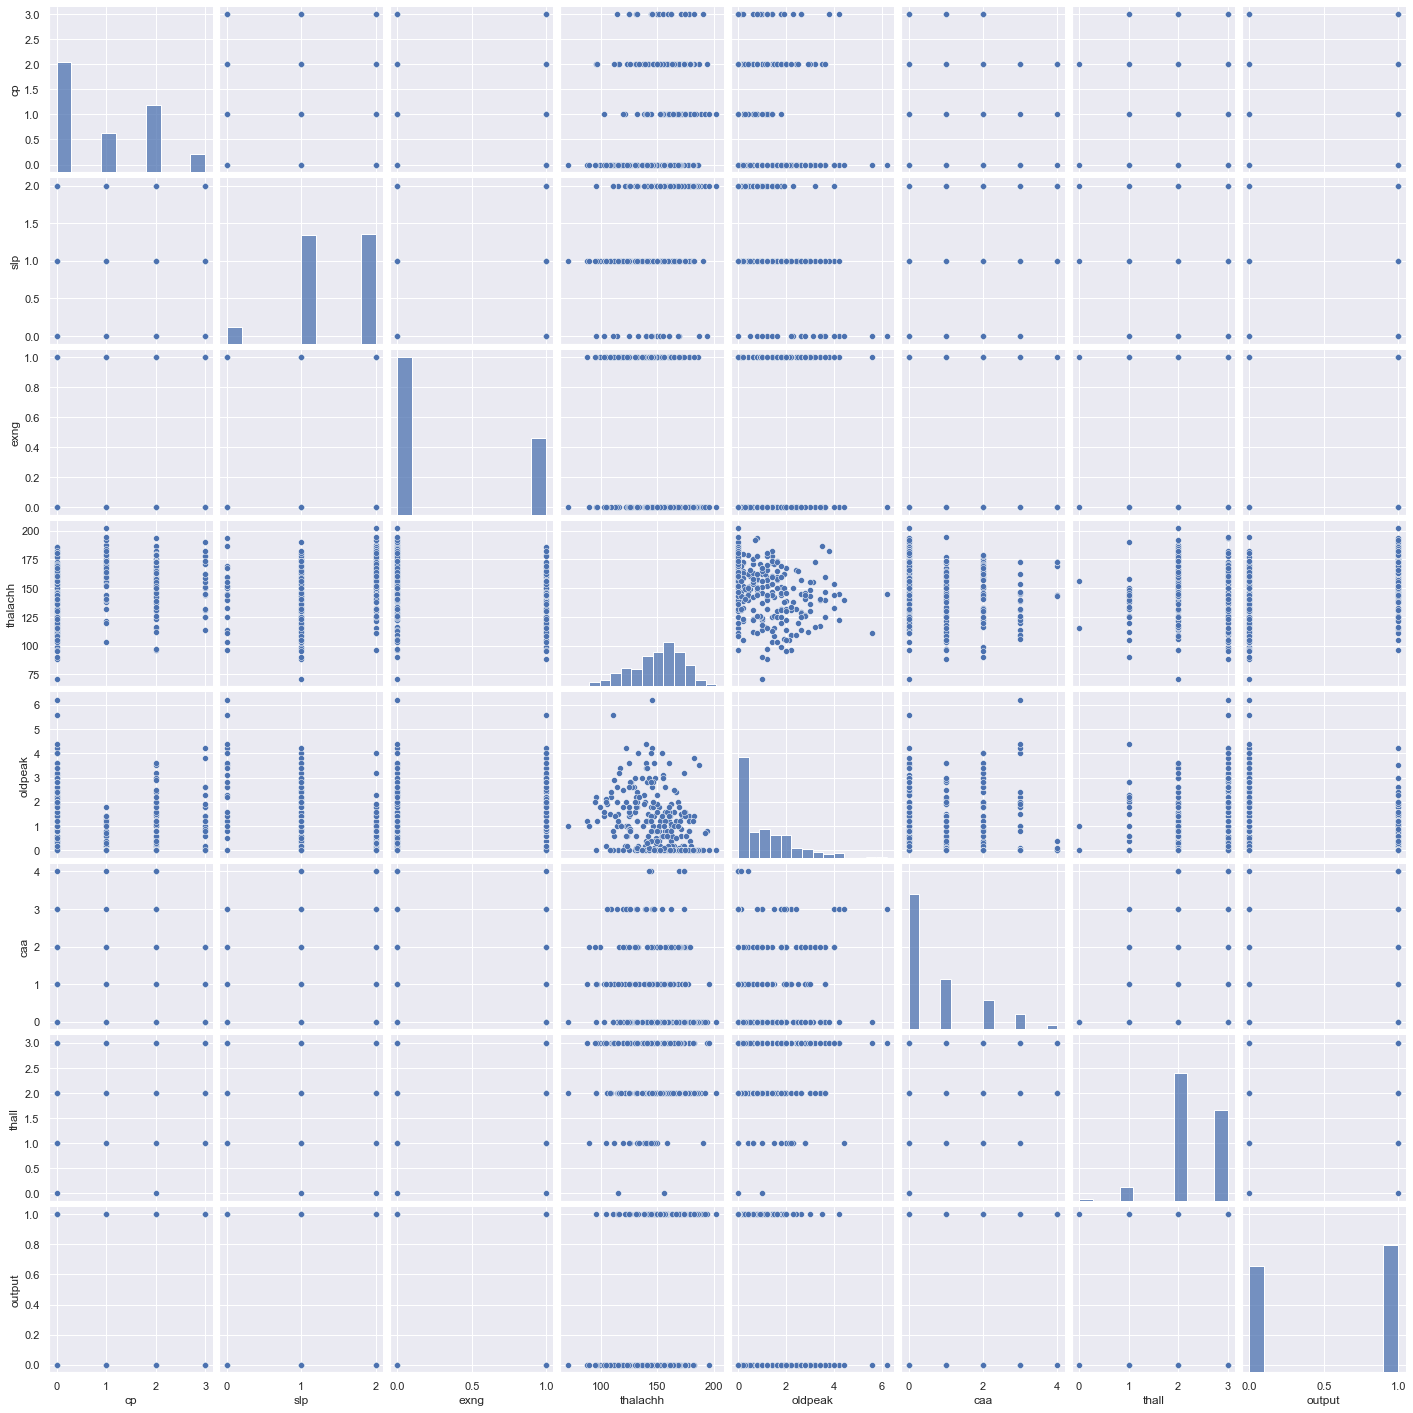

In [235]:
num_var = ['cp', 'slp', 'exng', 'thalachh', 'oldpeak','caa','thall', 'output' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

### correlation only with outpu

<AxesSubplot:title={'center':'Correlation output'}>

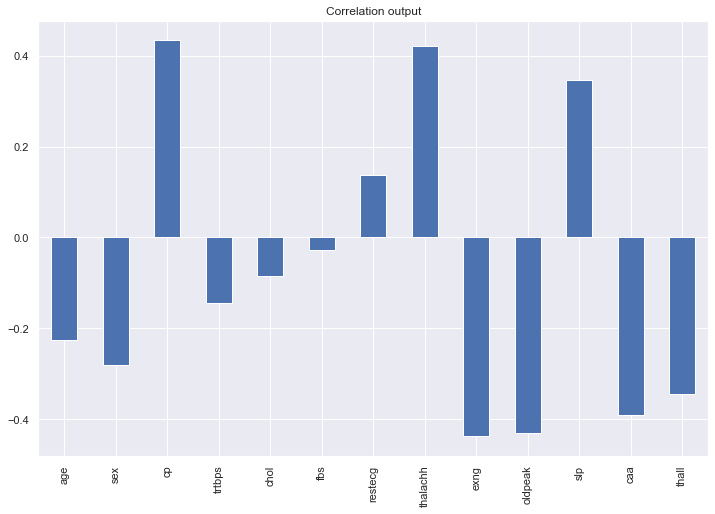

In [236]:
df.drop('output', axis=1).corrwith(df.output).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation output")

## utput_and_Thalech

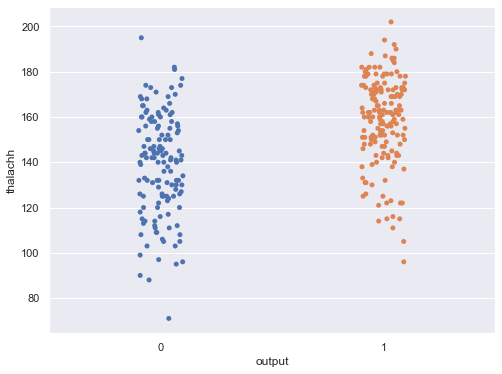

In [237]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="output", y="thalachh", data=df)
plt.show()

### Interpretation
* We can see that those people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).


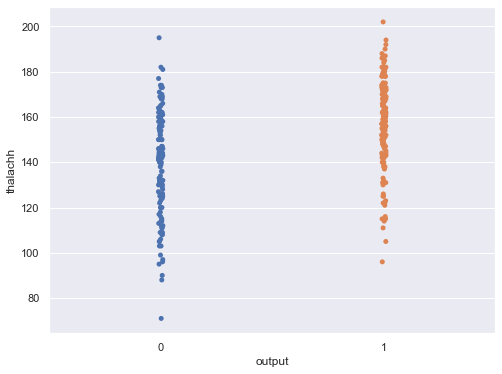

In [304]:
f, ax = plt.subplots(figsize=(8, 6))# with jitter
sns.stripplot(x="output", y="thalachh", data=df, jitter = 0.01)
plt.show()

## NORMALIZE THE VARIABLES 

### Normalization

In [239]:
y = df.output.values
x_dat = df.drop(['output'], axis = 1)
x=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values


   * 1)K-Nearest Neighbours Classifier
   * 2)Support Vector machine

## 1)KNN METHOD


In [240]:
from sklearn.neighbors import KNeighborsClassifier
y=df.output
x=df.drop("output",axis=1)


### A ) Train-test splitting

In [241]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

### B ) Modeling of KNN Medhod

In [242]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [243]:
knn  ##we can look at which option is there in KNeighborsClassifier
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     #metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     #weights='uniform')

KNeighborsClassifier(n_neighbors=3)

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

#### Look at accuracy_score

In [244]:
knn_score=accuracy_score(y_test,y_pred)
knn_score

0.6710526315789473

In [245]:
c_knn=confusion_matrix(y_test,y_pred)
c_knn

array([[24, 11],
       [14, 27]])

#### HEATMAP IN CONFUSION MATRIX: We can see the confusion matrix in Heatmap.

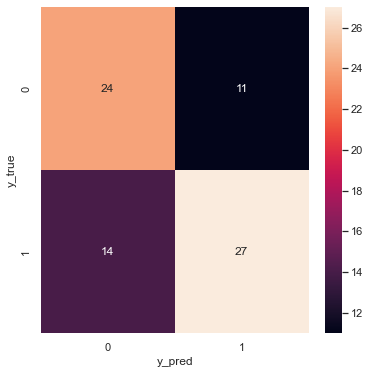

In [246]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=knn.predict(x_test)
cmknn=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmknn, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [305]:
print(classification_report(y_test,y_pred)) #yukarda import edildi

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



#### LOOK AT ALL PREDICTION VALUE ON TEST DATA.

In [248]:
knn.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [249]:
knn.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ]])

### E ) TUNING 
* we_can_tune(n_neigbors,metric,..)

In [250]:
RMSE = []   # ERROR ON TRAIN DATA

for k in range(30):
    k = k+1
    knn = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  0.3268458257842665
k = 3 için RMSE değeri:  0.38890636979101223
k = 4 için RMSE değeri:  0.3958067654736509
k = 5 için RMSE değeri:  0.41555652403686744
k = 6 için RMSE değeri:  0.42441402407048756
k = 7 için RMSE değeri:  0.4277315033573143
k = 8 için RMSE değeri:  0.43507430121427826
k = 9 için RMSE değeri:  0.440078902431684
k = 10 için RMSE değeri:  0.4431564793594221
k = 11 için RMSE değeri:  0.4459744581423064
k = 12 için RMSE değeri:  0.4530043290888892
k = 13 için RMSE değeri:  0.4520082365670547
k = 14 için RMSE değeri:  0.45505047423391665
k = 15 için RMSE değeri:  0.45564926271403683
k = 16 için RMSE değeri:  0.45290301983366077
k = 17 için RMSE değeri:  0.45520998825655523
k = 18 için RMSE değeri:  0.45550362035775893
k = 19 için RMSE değeri:  0.4546770061361863
k = 20 için RMSE değeri:  0.4514294477052938
k = 21 için RMSE değeri:  0.45285821599783027
k = 22 için RMSE değeri:  0.4528904592562519
k = 23 için RMSE değeri: 

In [251]:
from sklearn.model_selection import GridSearchCV  
#We use Grid for tuning

In [252]:
knn_params = {'n_neighbors': np.arange(1,30,1)} #we obta
knn = KNeighborsRegressor()

In [253]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10) #cross validation yontemi kullaniliyor.nesnesi tanimlandi
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [254]:
print("Best Score:"+str(knn_cv_model.best_score_))
print("Best Parameters:"+str(knn_cv_model.best_params_))

Best Score:0.04983262994767592
Best Parameters:{'n_neighbors': 21}


* use n_neighbors=21, we can obtain the best

In [255]:
knn_tuned =KNeighborsClassifier(n_neighbors = 21)
knn_tuned = knn_tuned.fit(x_train,y_train)
y_pred = knn_tuned.predict(x_test)
knn_tuned_score=accuracy_score(y_test,y_pred)
knn_tuned_score

0.7368421052631579

In [256]:
#np.sqrt(mean_squared_error(y_test, knn_tuned.predict(x_test)))

* we can tune and our score increase.

In [257]:
knn_tune2 =KNeighborsClassifier(n_neighbors = 21,metric='hamming')
knn_tune2.fit(x_train,y_train)
y_pred = knn_tune2.predict(x_test)
knn_tuned_bestscore=accuracy_score(y_test,y_pred)
knn_tuned_bestscore

0.8552631578947368

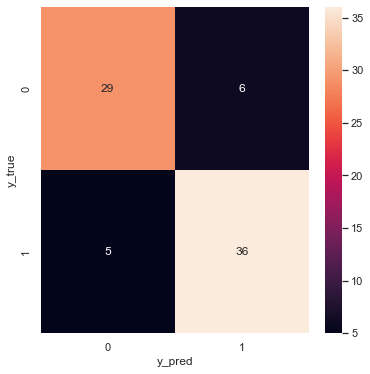

In [306]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=knn_tune2.predict(x_test)
cmknn_best=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmknn_best, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

* If we change metric and use tuned n-neigbors,acurracy_score is best..There are many kinds of metric in KNN. minkowski,hamming,.... 

### Conclusion KNN:
* knn_tuned_bestscore= % 85  

## 2)SVM(SUPPORT VECTOR MACHINES)


In [261]:
from sklearn.svm import SVC
y=df.output
x=df.drop("output",axis=1)

### A ) Train-test splitting

In [262]:
y = df.output
x = df.drop('output',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

### B ) Modeling of SVM Medhod

In [263]:
svm = SVC(C=5,degree=9,kernel = 'poly')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [264]:
#?svm

In [265]:
svm
#SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    #decision_function_shape='ovr', degree=9, gamma='scale', kernel='poly',
    #max_iter=-1, probability=False, random_state=None, shrinking=True,
    #tol=0.001, verbose=False)

SVC(C=5, degree=9, kernel='poly')

In [266]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [267]:
svm_score1 = accuracy_score(y_test,y_pred)
svm_score1

0.8421052631578947

In [268]:
c_svm=confusion_matrix(y_test,y_pred)
c_svm

array([[27,  8],
       [ 4, 37]])

#### HEATMAP IN CONFUSION MATRIX: We can see the confusion matrix in Heatmap.

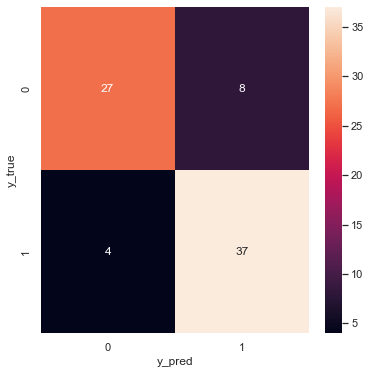

In [269]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=svm.predict(x_test)
cmsvm=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmsvm, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [313]:
print(classification_report(y_test,y_pred)) #yukarda import edildi

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



### E ) TUNING THE PREDICTION: WE can tune our prediction
* Look at c,kernel,gamma

#### Tuning1-change C and gamma

In [271]:
#EN UYGUN C VE GAMMA DEGERI BULMA
svc_params ={"C":[0.00001,0.001,0.01,5,10,50,100],
            "gamma":[0.0001,0.001,0.01,1,5,10,50,100]}
svc =SVC()
svc_cv_model = GridSearchCV(svc,svc_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
svc_cv_model.fit(x_train,y_train)
print("Best Parameters:"+str(svc_cv_model.best_params_))

Fitting 10 folds for each of 56 candidates, totalling 560 fits
Best Parameters:{'C': 100, 'gamma': 0.0001}


In [272]:
?svc_cv_model

In [311]:
svm_tune1= SVC(C=100,gamma= 0.0001,degree=9,kernel = 'poly')
svm_tune1.fit(x_train,y_train)
y_pred = svm.predict(x_test)  # cok uzun suruyor

In [312]:
svm_score2 = accuracy_score(y_test,y_pred)
svm_score2

0.8421052631578947

#### Tuning2-changing kernel=linear,c=100

In [275]:
#we changed the kernel,We can use linear,poly,rbf...
svm_tune2 = SVC(C=100,degree=9,kernel = 'linear')
svm_tune2.fit(x_train,y_train)
y_pred = svm_tune2.predict(x_test)
accuracy_score(y_test,y_pred)

0.8421052631578947

Tuning3-changing kernel=rbf,c=100

In [276]:
#we changed the kernel,We can use linear,poly,rbf...
svm_tune3 = SVC(C=100,degree=9,kernel = 'rbf')
svm_tune3.fit(x_train,y_train)
y_pred = svm_tune3.predict(x_test)
accuracy_score(y_test,y_pred)

0.8157894736842105

In [314]:
#svc_tuned=SVC(C=100,gamma=0.0001,kernel = 'linear')
 #svc_tuned.fit(x_train,y_train)
#y_pred = svc_tuned.predict(x_test)
#accuracy_score(y_test,y_pred)    #uzun suruyor

### Conclusion:

* svm_score1=84.2

## SEE ALL SCORE OF CLASSIFICATIONS METHODS 

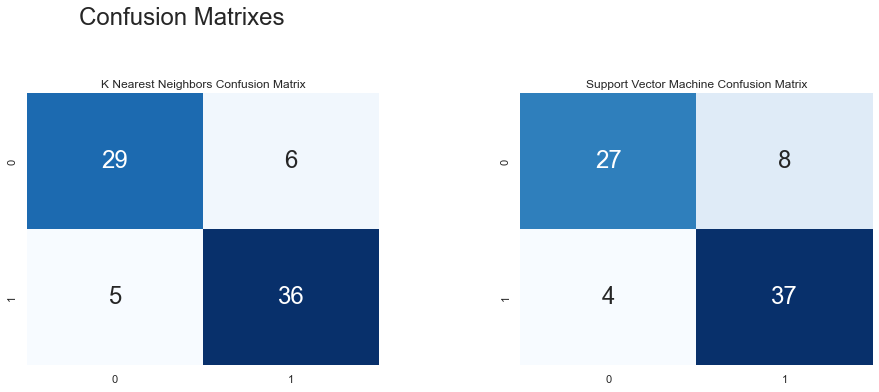

In [282]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cmknn_best,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(c_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})




plt.show()

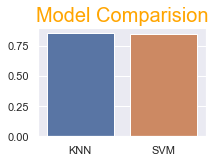

In [320]:
indexx = ["KNN","SVM"]
regressions = [knn_tuned_bestscore,svm_score1]

plt.figure(figsize=(3,2))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);

## THANKS 
#MEHMET OMER DEMIR